In [ ]:
##Question: Do certain attributes (reach, grip strength on different hold types, etc.) allow climbers to outperform other 
##climbers regardless of the randomly generated wall they are climbing on? AKA, is there an ideal body type for climbing?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

In [23]:
class climber:
    def __init__(self, reach, sloper, crimp, jug, position = np.array([5,0]), icon="*"):
        
        self.reach = reach
        ##Strength (Percent Chance of Sticking a Move To) on Different Types of Holds/Rock
        self.sloper = sloper
        self.crimp = crimp
        self.jug = jug
        ##Location on the wall
        self.position = position
        ##Icon for visualization
        self.icon = icon
        
    def make_move(self, holds):
        reachable = []
        for hold in holds:
            print(np.linalg.norm(self.position, hold.coords))
            if self.reach > np.linalg.norm(self.position, hold.coords):
                reachable.append(hold)
        
        for hold in reachable:
            if hold.type == 'sloper':
                if random.rand() < self.sloper:
                    self.position = hold.coords
                    return 'stuck'
            elif hold.type == 'jug':
                if random.rand() < self.jug:
                    self.position = hold.coords
                    return 'stuck'
            elif hold.type == 'crimp':
                if random.rand() < self.crimp:
                    self.position = hold.coords
                    return 'stuck'
                
        return 'fall'
    
    def reset_position(self):
        self.position = np.array([5,0])

In [6]:
class Hold:
    def __init__(self, coords, type_):
        self.coords = np.array(coords)
        self.type = type_

In [7]:
class cell:
    def __init__(self, slopers, crimps, jugs):
        ##Number of Each Type of Hold/Rock
        self.slopers = slopers
        self.crimps = crimps
        self.jugs = jugs
        self.num_cells = 1
        
        ##Setting Coordinates of the Holds
        self.total_holds = self.slopers + self.crimps + self.jugs
        self.x = np.random.randint(1, 10, size = self.total_holds)
        self.y = np.random.randint(1, 10, size = self.total_holds)
        self.holds = []
        self.hold_types = []
        for i in range(slopers):
            new_hold = Hold([self.x[i], self.y[i]], "sloper")
            self.holds.append(new_hold)
            self.hold_types.append("sloper")
        for i in range(crimps):
            new_hold = Hold([self.x[i], self.y[i]], "crimp")
            self.holds.append(new_hold)
            self.hold_types.append("crimp")
        for i in range(jugs):
            new_hold = Hold([self.x[i], self.y[i]], "jug")
            self.holds.append(new_hold)       
            self.hold_types.append("jug")
        
    def show(self):
        sns.scatterplot(x = self.x,y = self.y, hue = self.hold_types, style = self.holds, palette = 'bright', s = 100)
        plt.axis([0,10, 0, 10])
        plt.show()

In [19]:
class wall:
    def __init__(self, smallwall, cell):
        ##Number of Each Type of Hold/Rock
        self.slopers = smallwall.slopers + cell.slopers
        self.crimps = smallwall.crimps + cell.crimps
        self.jugs = smallwall.jugs + cell.jugs
        self.num_cells = smallwall.num_cells + cell.num_cells
        self.hold_types = smallwall.hold_types + cell.hold_types
        ##Setting Coordinates of the Holds
        self.total_holds = self.slopers + self.crimps + self.jugs
        self.x = np.concatenate((smallwall.x, cell.x))
        self.y = np.concatenate((smallwall.y, cell.y + np.repeat(10*(self.num_cells-1), len(cell.y))))
        self.holds = np.concatenate((smallwall.holds, cell.holds))
        
        self.hold_cords = []
        for i in range(self.total_holds):
            self.hold_cords.append([self.x[i], self.y[i]])
        
    def show(self, show_scale = 1, title = 'Rock Wall'):
        fig = plt.figure(figsize = (10*show_scale, len(self.x)*show_scale))
        sns.scatterplot(x = self.x,y = self.y, hue = self.hold_types, style = self.hold_types, palette = 'bright', s = 100)
        plt.axis([0,10, 0, 10*self.num_cells])
        plt.title(title)
        plt.show()
        
    def run_wall(self, climber):
        path = []
        status = "stuck"
        while status == "stuck":
            path.append(climber.position)
            status = climber.make_move(self.holds)
        #stuff
        print(path)
        #plot climber positions
    #Pseudocode from this point on----------------------------------------------------------------------
    #def run_wall(self,): #don't know the other paramters just yet.
#        path = [] #will hold coordinates of the climbers path
#        for i in cimber.make_mv:
#            path.append(climber.position)#assuming that the climbers position is given as a coordinate, this will hold his current position afetr every move
        #After this, something to calculate the total distance covered (i guess only the distance between first and last point is what matters)
#        fig = plt.figure(figsize = (10*show_scale, len(self.x)*show_scale))#This line down will create a plot showing the climbers line
#        plt.axis([0,10, 0, 10*self.num_cells])
#        plt.title("Climber Path")      

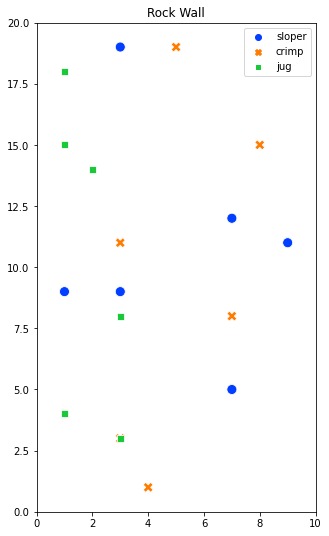

/opt/anaconda3/lib/python3.8/site-packages/numpy/linalg/linalg.py:2522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (ord in ('f', 'fro') and ndim == 2) or


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [24]:
cell1 = cell(3,3,3)
cell2 = cell(3,3,3)

wall1 = wall(cell1, cell2)
wall1.show(1/2)
plt.legend
climber1 = climber(4, 0.8, 0.8, 0.8)
print(climber1.make_move(wall1.holds))
#wall1.run_wall(climber1)

In [ ]:
##Notes
##We decided two holds being placed in the same location is appropriate given that many climbing gyms will drill one hold on 
##top of another to make the move easier/more attainable for different climbing types